<a href="https://colab.research.google.com/github/rashmigpai/IntroToBigData/blob/main/IntroToDataScience_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 70kB/s 
     |████████████████████████████████| 204kB 28.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=2ab4e9c44adcac838c88529106c6530aca822a9b1e77b781b8450f85260b2303
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [2]:
!apt-get update 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [55.5 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [3]:
# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [4]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [5]:
# install findspark using pip
!pip install -q findspark
import findspark
findspark.init()


In [6]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *

spark = SparkSession \
.builder \
.master("local") \
.appName("Housing Data") \
.config("spark.sql.shuffle.partitions","1") \
.getOrCreate()

In [7]:
schema = StructType([
    StructField("long", FloatType(), nullable=True),
    StructField("lat", FloatType(), nullable=True),
    StructField("medage", FloatType(), nullable=True),
    StructField("totrooms", FloatType(), nullable=True),
    StructField("totbdrms", FloatType(), nullable=True),
    StructField("pop", FloatType(), nullable=True),
    StructField("houshlds", FloatType(), nullable=True),
    StructField("medinc", FloatType(), nullable=True),
    StructField("medhv", FloatType(), nullable=True)]
)

In [8]:
housing_df = spark.read.csv(path='cal_housing.csv', schema=schema).cache()
housing_df.columns

['long',
 'lat',
 'medage',
 'totrooms',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'medhv']

The [California Housing data set](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) appeared in a 1997 paper titled Sparse Spatial Autoregressions, written by Pace, R. Kelley and Ronald Barry and published in the Statistics and Probability Letters journal. The researchers built this data set by using the 1990 California census data.

**Longitude:** refers to the angular distance of a geographic place north or south of the earth’s equator for each block group

**Latitude:** refers to the angular distance of a geographic place east or west of the earth’s equator for each block group

**Housing Median Age:** is the median age of the people that belong to a block group. Note that the median is the value that lies at the midpoint of a frequency distribution of observed values

**Total Rooms:** is the total number of rooms in the houses per block group

**Total Bedrooms:** is the total number of bedrooms in the houses per block group

**Population:** is the number of inhabitants of a block group

**Households:** refers to units of houses and their occupants per block group

**Median Income:** is used to register the median income of people that belong to a block group

**Median House Value:** is the dependent variable and refers to the median house value per block group

In [9]:
housing_df.printSchema()
housing_df.show(5, truncate=False)

root
 |-- long: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- medage: float (nullable = true)
 |-- totrooms: float (nullable = true)
 |-- totbdrms: float (nullable = true)
 |-- pop: float (nullable = true)
 |-- houshlds: float (nullable = true)
 |-- medinc: float (nullable = true)
 |-- medhv: float (nullable = true)

+-------+-----+------+--------+--------+------+--------+------+--------+
|long   |lat  |medage|totrooms|totbdrms|pop   |houshlds|medinc|medhv   |
+-------+-----+------+--------+--------+------+--------+------+--------+
|-122.23|37.88|41.0  |880.0   |129.0   |322.0 |126.0   |8.3252|452600.0|
|-122.22|37.86|21.0  |7099.0  |1106.0  |2401.0|1138.0  |8.3014|358500.0|
|-122.24|37.85|52.0  |1467.0  |190.0   |496.0 |177.0   |7.2574|352100.0|
|-122.25|37.85|52.0  |1274.0  |235.0   |558.0 |219.0   |5.6431|341300.0|
|-122.25|37.85|52.0  |1627.0  |280.0   |565.0 |259.0   |3.8462|342200.0|
+-------+-----+------+--------+--------+------+--------+------+--------+
only sh

Checking for null values

In [10]:
housing_df.createOrReplaceTempView("DATA")
for column in housing_df.columns:
    print(f"printing rows where {column} is null")
    spark.sql(f"SELECT * FROM DATA where {column} IS NULL").show()

printing rows where long is null
+----+---+------+--------+--------+---+--------+------+-----+
|long|lat|medage|totrooms|totbdrms|pop|houshlds|medinc|medhv|
+----+---+------+--------+--------+---+--------+------+-----+
+----+---+------+--------+--------+---+--------+------+-----+

printing rows where lat is null
+----+---+------+--------+--------+---+--------+------+-----+
|long|lat|medage|totrooms|totbdrms|pop|houshlds|medinc|medhv|
+----+---+------+--------+--------+---+--------+------+-----+
+----+---+------+--------+--------+---+--------+------+-----+

printing rows where medage is null
+----+---+------+--------+--------+---+--------+------+-----+
|long|lat|medage|totrooms|totbdrms|pop|houshlds|medinc|medhv|
+----+---+------+--------+--------+---+--------+------+-----+
+----+---+------+--------+--------+---+--------+------+-----+

printing rows where totrooms is null
+----+---+------+--------+--------+---+--------+------+-----+
|long|lat|medage|totrooms|totbdrms|pop|houshlds|medinc

Data Exploration
---




In [11]:
housing_df.select('pop','totbdrms').show(10)

+------+--------+
|   pop|totbdrms|
+------+--------+
| 322.0|   129.0|
|2401.0|  1106.0|
| 496.0|   190.0|
| 558.0|   235.0|
| 565.0|   280.0|
| 413.0|   213.0|
|1094.0|   489.0|
|1157.0|   687.0|
|1206.0|   665.0|
|1551.0|   707.0|
+------+--------+
only showing top 10 rows



Distribution of the median age of the people living in the area:
---

In [12]:
result_df = housing_df.groupBy("medage").count().sort("medage", ascending=False)
result_df.show(10)

+------+-----+
|medage|count|
+------+-----+
|  52.0| 1273|
|  51.0|   48|
|  50.0|  136|
|  49.0|  134|
|  48.0|  177|
|  47.0|  198|
|  46.0|  245|
|  45.0|  294|
|  44.0|  356|
|  43.0|  353|
+------+-----+
only showing top 10 rows



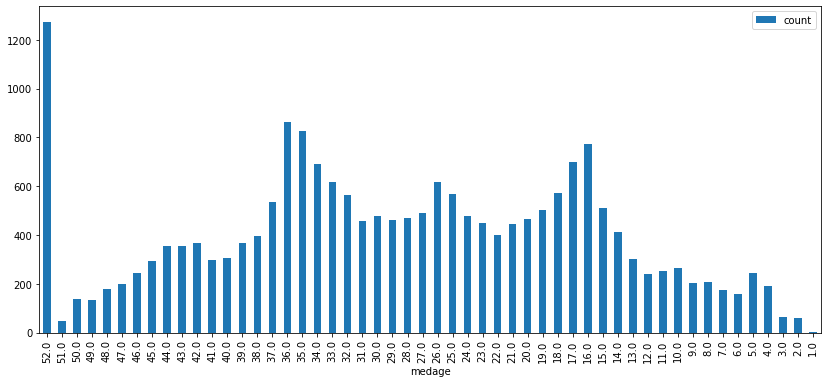

In [13]:
result_df.toPandas().plot.bar(x='medage',figsize=(14, 6))

Most of the residents are either in their youth or they settle here during their senior years. Some data are showing median age < 10 which seems to be out of place.



Summary Statistics:
---

Spark DataFrames include some built-in functions for statistical processing. The describe() function performs summary statistics calculations on all numeric columns and returns them as a DataFrame.

In [14]:
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col
(housing_df.describe().select(
                    "summary",
                    F.round("medage", 4).alias("medage"),
                    F.round("totrooms", 4).alias("totrooms"),
                    F.round("totbdrms", 4).alias("totbdrms"),
                    F.round("pop", 4).alias("pop"),
                    F.round("houshlds", 4).alias("houshlds"),
                    F.round("medinc", 4).alias("medinc"),
                    F.round("medhv", 4).alias("medhv"))
                    .show())

+-------+-------+---------+--------+---------+--------+-------+-----------+
|summary| medage| totrooms|totbdrms|      pop|houshlds| medinc|      medhv|
+-------+-------+---------+--------+---------+--------+-------+-----------+
|  count|20640.0|  20640.0| 20640.0|  20640.0| 20640.0|20640.0|    20640.0|
|   mean|28.6395|2635.7631| 537.898|1425.4767|499.5397| 3.8707|206855.8169|
| stddev|12.5856|2181.6153|421.2479|1132.4621|382.3298| 1.8998|115395.6159|
|    min|    1.0|      2.0|     1.0|      3.0|     1.0| 0.4999|    14999.0|
|    max|   52.0|  39320.0|  6445.0|  35682.0|  6082.0|15.0001|   500001.0|
+-------+-------+---------+--------+---------+--------+-------+-----------+



Looking at the minimum and maximum values of all the (numerical) attributes. We see that multiple attributes have a wide range of values: we will need to normalize the dataset.

Correlation
---

Lets try to find out what's the correlation among various columns

In [34]:
from pyspark.ml.stat import Correlation
columns = housing_df.columns
columns.remove("medhv")
[(f'{column}<->medhv', housing_df.stat.corr(column,"medhv")) \
 for column in columns]

[('long<->medhv', -0.04596662870932146),
 ('lat<->medhv', -0.14416027126511027),
 ('medage<->medhv', 0.1056234124932107),
 ('totrooms<->medhv', 0.13415311380656275),
 ('totbdrms<->medhv', 0.05059378881206679),
 ('pop<->medhv', -0.024649678888894865),
 ('houshlds<->medhv', 0.0658426505700564),
 ('medinc<->medhv', 0.688075207464692)]

In [32]:
import matplotlib.pyplot as plt
import matplotlib
def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(figsize=(18,10))
    ax=fig.add_subplot(1,1,1)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,cmap=matplotlib.cm.hot_r)
    fig.colorbar(cax)
    plt.rcParams.update({'font.size': 10})
    plt.show()

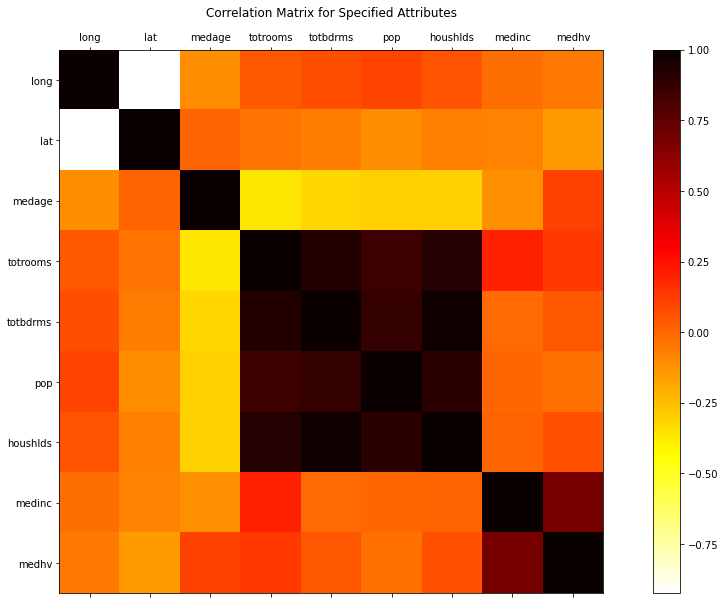

In [33]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.mllib.stat import Statistics
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=housing_df.columns, 
                            outputCol=vector_col)
myGraph_vector = assembler.transform(housing_df).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
plot_corr_matrix(corrmatrix, housing_df.columns, 200)

As seen from the `Correlation` stat helper and above heat map, we can conclude
* `lat`, `long` have no correlation with `medhv`
* `medinc` has strong correlation with `medhv`
* `medage` doesn't have strong correlation with most of the other columns

Data Preprocessing
---

With all this information that we gathered from our small exploratory data analysis, we know enough to preprocess our data to feed it to the model.

* we shouldn't care about missing values; all null values have been excluded from the data set.

* We should probably standardize our data, as we have seen that the range of minimum and maximum values is quite big.

* There are possibly some additional attributes that we could add, such as a feature that registers the number of bedrooms per room or the rooms per household.

* Our dependent variable is also quite big; To make our life easier, we'll have to adjust the values slightly.

Preprocessing The Target Values
----

First, let's start with the `medianHouseValue`, our dependent variable. 

To facilitate our working with the target values, we will express the house values in units of 100,000. That means that a target such as 452600.000000 should become 4.526

In [15]:
housing_df_1 = housing_df.withColumn("medhv", col("medhv")/100000)
housing_df_1.show(2)

+-------+-----+------+--------+--------+------+--------+------+-----+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|medhv|
+-------+-----+------+--------+--------+------+--------+------+-----+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|4.526|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|3.585|
+-------+-----+------+--------+--------+------+--------+------+-----+
only showing top 2 rows



We can clearly see that the values have been adjusted correctly when we look at the result of the show() method

Feature Engineering
---

Now that we have adjusted the values in medianHouseValue, we will now add the following columns to the data set:

* `rmsperhh` -- **Rooms per household** which refers to the number of rooms in households per block group
* `popperhh` -- **Population per household**, which basically gives us an indication of how many people live in households per block group
* `bdrmsperrm` -- **Bedrooms per room** which will give us an idea about how many rooms are bedrooms per block group;

As we're working with DataFrames, we can best use the select() method to select the columns that we're going to be working with, namely totalRooms, households, and population. 

Additionally, we have to indicate that we're working with columns by adding the col() function to our code. Otherwise, we won't be able to do element-wise operations like the division that we have in mind for these three variables:

In [16]:
housing_df_1 = (housing_df_1.withColumn("rmsperhh", F.round(col("totrooms")/col("houshlds"), 2))
                       .withColumn("popperhh", F.round(col("pop")/col("houshlds"), 2))
                       .withColumn("bdrmsperrm", F.round(col("totbdrms")/col("totrooms"), 2)))
housing_df_1.show(10, truncate=False)

+-------+-----+------+--------+--------+------+--------+------+-----+--------+--------+----------+
|long   |lat  |medage|totrooms|totbdrms|pop   |houshlds|medinc|medhv|rmsperhh|popperhh|bdrmsperrm|
+-------+-----+------+--------+--------+------+--------+------+-----+--------+--------+----------+
|-122.23|37.88|41.0  |880.0   |129.0   |322.0 |126.0   |8.3252|4.526|6.98    |2.56    |0.15      |
|-122.22|37.86|21.0  |7099.0  |1106.0  |2401.0|1138.0  |8.3014|3.585|6.24    |2.11    |0.16      |
|-122.24|37.85|52.0  |1467.0  |190.0   |496.0 |177.0   |7.2574|3.521|8.29    |2.8     |0.13      |
|-122.25|37.85|52.0  |1274.0  |235.0   |558.0 |219.0   |5.6431|3.413|5.82    |2.55    |0.18      |
|-122.25|37.85|52.0  |1627.0  |280.0   |565.0 |259.0   |3.8462|3.422|6.28    |2.18    |0.17      |
|-122.25|37.85|52.0  |919.0   |213.0   |413.0 |193.0   |4.0368|2.697|4.76    |2.14    |0.23      |
|-122.25|37.84|52.0  |2535.0  |489.0   |1094.0|514.0   |3.6591|2.992|4.93    |2.13    |0.19      |
|-122.25|3

We can see that, for the first row, there are about 6.98 `rmsperhh`, the households in the block group consist of about 2.5 `popperhh` and the amount of bedrooms is quite low with 0.14 `bdrmsperrm`:

Since we don't want to necessarily standardize our target values, we'll want to make sure to isolate those in our data set. Note also that this is the time to leave out variables that we might not want to consider in our analysis. In this case, let's leave out variables such as `longitude`, `latitude`, `housingMedianAge` and `totalRooms`.

In this case, we will use the select() method and passing the column names in the order that is more appropriate. In this case, the target variable `medianHouseValue` is put first, so that it won't be affected by the standardization.

In [17]:
# Re-order and select columns
housing_df_1 = housing_df_1.select("medhv", 
                              "totbdrms", 
                              "pop", 
                              "houshlds", 
                              "medinc", 
                              "rmsperhh", 
                              "popperhh", 
                              "bdrmsperrm")

Feature Extraction
---

Now that we have re-ordered the data, we're ready to normalize the data. We will choose the features to be normalized

Use a VectorAssembler to put features into a feature vector column

In [21]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
featureCols = ["totbdrms", "pop", "houshlds", "medinc", "rmsperhh", "popperhh", "bdrmsperrm"]
# put features into a feature vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features") 
assembled_df = assembler.transform(housing_df_1)
assembled_df.show(10, truncate=False)

+-----+--------+------+--------+------+--------+--------+----------+-------------------------------------------------------+
|medhv|totbdrms|pop   |houshlds|medinc|rmsperhh|popperhh|bdrmsperrm|features                                               |
+-----+--------+------+--------+------+--------+--------+----------+-------------------------------------------------------+
|4.526|129.0   |322.0 |126.0   |8.3252|6.98    |2.56    |0.15      |[129.0,322.0,126.0,8.325200080871582,6.98,2.56,0.15]   |
|3.585|1106.0  |2401.0|1138.0  |8.3014|6.24    |2.11    |0.16      |[1106.0,2401.0,1138.0,8.301400184631348,6.24,2.11,0.16]|
|3.521|190.0   |496.0 |177.0   |7.2574|8.29    |2.8     |0.13      |[190.0,496.0,177.0,7.257400035858154,8.29,2.8,0.13]    |
|3.413|235.0   |558.0 |219.0   |5.6431|5.82    |2.55    |0.18      |[235.0,558.0,219.0,5.643099784851074,5.82,2.55,0.18]   |
|3.422|280.0   |565.0 |259.0   |3.8462|6.28    |2.18    |0.17      |[280.0,565.0,259.0,3.8461999893188477,6.28,2.18,0.17]  |


Standardization
---
Next, we can finally scale the data using StandardScaler. The input columns are the features, and the output column with the rescaled that will be included in the scaled_df will be named "features_scaled"

In [22]:
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)
scaled_df.select("features", "features_scaled").show(10, truncate=False)

+-------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------+
|features                                               |features_scaled                                                                                                                       |
+-------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------+
|[129.0,322.0,126.0,8.325200080871582,6.98,2.56,0.15]   |[0.30623297630686513,0.2843362208866199,0.3295584480852433,4.38209543579743,2.8211223886115664,0.24648542140099877,2.5828740130262697]|
|[1106.0,2401.0,1138.0,8.301400184631348,6.24,2.11,0.16]|[2.6255323394991694,2.1201592122632746,2.9764882057222772,4.36956799913841,2.522034914747303,0.20315790592035446,2.755065613894688]   |
|[190.0,496.0,177.0,7.2574000358581

Building A Machine Learning Model With Spark ML
---
With all the preprocessing done, it's finally time to start building our Linear Regression model! Just like always, we first need to split the data into training and test sets. Luckily, this is no issue with the randomSplit() method:

In [23]:
import numpy as np
rnd_seed=23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [24]:
train_data, test_data = scaled_df.randomSplit([.8,.2], seed=rnd_seed)

In [25]:
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.evaluation import RegressionEvaluator

Create an ElasticNet model:
---
ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [35]:
# Initialize `lr`
lr = (LinearRegression(featuresCol='features_scaled', labelCol="medhv", predictionCol='predmedhv', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False))

In [36]:
# Fit the data to the model
linearModel = lr.fit(train_data)

Evaluating the Model
---
With our model in place, we can generate predictions for our test data: use the transform() method to predict the labels for our test_data. Then, we can use RDD operations to extract the predictions as well as the true labels from the DataFrame.



**Inspect the Model Co-efficients**



In [37]:
linearModel.coefficients

DenseVector([0.0, 0.0, 0.0, 0.5262, 0.0, 0.0, 0.0])

In [43]:
import pandas as pd
coeff_df = pd.DataFrame({"Feature": ["Intercept"] + featureCols, \
                         "Co-efficients": np\
                         .insert(\
                                 linearModel.coefficients.toArray(), \
                                 0, \
                                 linearModel.intercept)})
coeff_df = coeff_df[["Feature", "Co-efficients"]]
coeff_df

,Feature,Co-efficients
0,Intercept,1.001383
1,totbdrms,0.000000
2,pop,0.000000
3,houshlds,0.000000
4,medinc,0.526157
5,rmsperhh,0.000000
6,popperhh,0.000000
7,bdrmsperrm,0.000000


### Generating Predictions

In [44]:
# Generate predictions
predictions = linearModel.transform(test_data)
# Extract the predictions and the "known" correct labels
predandlabels = predictions.select("predmedhv", "medhv")
predandlabels.show()

+------------------+-------+
|         predmedhv|  medhv|
+------------------+-------+
|  1.14982901467337|0.14999|
|1.3037582901805782|  0.225|
| 1.752972574315186|  0.225|
|1.6094289295308724|  0.269|
|1.5956645319495768|  0.344|
|1.2917940087238426|  0.367|
|1.8668547795751218|  0.375|
| 1.369423339785637|  0.394|
|1.5305533439120043|  0.398|
|1.5715143715849273|  0.409|
|1.3261913014043998|  0.417|
| 1.229923204690587|  0.425|
|1.4841640700933143|  0.425|
|1.3510338217435218|   0.43|
|1.2619110212709588|  0.436|
|1.3350814464678744|   0.44|
|1.4832778453641755|   0.44|
|1.4337313361080328|  0.444|
|1.3691187093204966|  0.445|
|  1.47521855868216|  0.446|
+------------------+-------+
only showing top 20 rows



#### Inspect the Metrics
---
Looking at predicted values is one thing, but another and better thing is looking at some metrics to get a better idea of how good your model actually is.

Using the `LinearRegressionModel.summary attribute`

Next, we can also use the summary attribute to pull up the `rootMeanSquaredError` and the `r2`.

In [40]:
print("RMSE: {0}".format(linearModel.summary.rootMeanSquaredError))
print("MAE: {0}".format(linearModel.summary.meanAbsoluteError))
print("R2: {0}".format(linearModel.summary.r2))

RMSE: 0.8819852045268861
MAE: 0.6782895319917991
R2: 0.4180854895364573


* The RMSE measures how much error there is between two datasets comparing a predicted value and an observed or known value. The smaller an RMSE value, the closer predicted and observed values are.

* The R2 ("R squared") or the coefficient of determination is a measure that shows how close the data are to the fitted regression line. This score will always be between 0 and a 100% (or 0 to 1 in this case), where 0% indicates that the model explains none of the variability of the response data around its mean, and 100% indicates the opposite: it explains all the variability. That means that, in general, the higher the R-squared, the better the model fits our data.



In [42]:
evaluator = RegressionEvaluator(predictionCol="predmedhv", labelCol='medhv', \
                                metricName='rmse')
print("RMSE: {0}".format(evaluator.evaluate(predandlabels)))
evaluator = RegressionEvaluator(predictionCol="predmedhv", labelCol='medhv', \
                                metricName='mae')
print("MAE: {0}".format(evaluator.evaluate(predandlabels)))
evaluator = RegressionEvaluator(predictionCol="predmedhv", labelCol='medhv', \
                                metricName='r2')
print("R2: {0}".format(evaluator.evaluate(predandlabels)))

RMSE: 0.8677342923034236
MAE: 0.6736097745764633
R2: 0.42517112885139363


Summary
---

From the above we can observe that the accuracy of the solution is around 42.5% which is not so great so LinearRegression might not be that suitable for the system